**Filip Koźlik** \

In [1]:
!pip install beautifulsoup4

In [2]:
!pip install requests

**Task 1.**\

Download the contents of https://ms.polsl.pl/kzmimsi/pracownicy/. \
Extract the staff list from the content. \
Create a bar chart to show a summary of the number of Masters, PhDs and Professors in the Department.

In [13]:
from pydantic import BaseModel
from typing import TypeVar, List, Generic

TDataType = TypeVar('TDataType')

class EmployeeDto(BaseModel):
  name: str # Full name of employee described at page
  url: str # Url to data about selected employee
  title: str # Employee title

class ResponseCollectionDto(BaseModel):
  collection: List[TDataType]
  count: int

In [31]:
from typing import Final

# * Defined needed consts for extracting data from below page
CHAIR_OF_APPLIED_MATHEMATICS_URL: Final[str] = 'https://ms.polsl.pl/kzmimsi/pracownicy/'
EMPLOYEE_DATA_SELECTOR: Final[str] = 'a.light div.pracownik'
EMPLOYEE_IMG_SELECTOR: Final[str] = 'img'
EMPLOYEE_STRONG_SELECTOR: Final[str] = 'strong'
EMPLOYEE_IMG_ALT_SELECTOR: Final[str] = 'alt'
EMPLOYEE_IMG_SRC_SELECTOR: Final[str] = 'src'

In [6]:
import requests
from bs4 import BeautifulSoup

class ScrapeService:

  @staticmethod
  def get_response_as_soup(url: str) -> BeautifulSoup:
    """
    Definition of static method for converting scrapped results into bs4 object.

    Args:
      url (__str__): String representation of url to scrape.
    """
    response = requests.get(url)

    if response.status_code != 200:
      return

    return BeautifulSoup(response.text, 'html.parser')

In [55]:
from abc import ABC, abstractmethod
from dataclasses import dataclass
from typing import Optional, Any

@dataclass
class AbstractParseService(ABC):

    soup: BeautifulSoup  # Object created based on api response

    @abstractmethod
    def parse(self) -> ResponseCollectionDto:
        """
        Should parse expected results and return them in the scheme of ResponseCollectionDto.

        Returns:
          ResponseCollectionDto: Representation of objects collection as ResponseCollectionDto of the provided type.
        """
        ...

@dataclass
class ChairOfAppliedMathematicsParseService(AbstractParseService):

  def parse(self) -> ResponseCollectionDto:
    """
    Definition of parse method for extracting needed information about employees.

    Returns:
      ResponseCollectionDto: Data described as ResponseCollectionDto object.
    """
    items = self.soup.select(EMPLOYEE_DATA_SELECTOR)
    collection = list()

    for div in items:
      img_tag = div.find(EMPLOYEE_IMG_SELECTOR)
      strong_tag = self._get_null_or_value(div.find(EMPLOYEE_STRONG_SELECTOR))

      if img_tag:
          alt_value = img_tag.get(EMPLOYEE_IMG_ALT_SELECTOR)
          src_value = img_tag.get(EMPLOYEE_IMG_SRC_SELECTOR)
          collection.append(EmployeeDto(
              name = alt_value,
              url = src_value,
              title = strong_tag
          ))
    return ResponseCollectionDto(
        collection = collection,
        count = len(collection)
    )

  def _get_null_or_value(self, value: str) -> Optional[str]:
    return value.text if value else None


In [53]:
soup = ScrapeService.get_response_as_soup(CHAIR_OF_APPLIED_MATHEMATICS_URL)
parser = ChairOfAppliedMathematicsParseService(soup)
parsed_data = parser.parse()

In [54]:
parsed_data

ResponseCollectionDto(collection=[EmployeeDto(name='dr Katarzyna Adrianowicz', url='https://ms.polsl.pl/_zdjecia/adri.jpg', title='dr Katarzyna Adrianowicz'), EmployeeDto(name='mgr inż. Arkadiusz Banasik', url='https://ms.polsl.pl/_zdjecia/bana.jpg', title='mgr inż. Arkadiusz Banasik'), EmployeeDto(name='Błasik', url='https://ms.polsl.pl/kzmimsi/images/nn.png', title='dr inż. Marek Błasik'), EmployeeDto(name='prof. dr hab. Mykola Bratiichuk', url='https://ms.polsl.pl/_zdjecia/brat.jpg', title='prof. dr hab. Mykola Bratiichuk'), EmployeeDto(name='dr inż. Rafał Brociek', url='https://ms.polsl.pl/_zdjecia/broc.jpg', title='dr inż. Rafał Brociek'), EmployeeDto(name='Capizzi', url='https://ms.polsl.pl/kzmimsi/images/nn.png', title='dr Giacomo Capizzi'), EmployeeDto(name='dr Robertas Damaševičius', url='https://ms.polsl.pl/_zdjecia/dama.jpg', title='dr Robertas Damaševičius'), EmployeeDto(name='dr hab. inż. Edyta Hetmaniok', url='https://ms.polsl.pl/_zdjecia/hetm.jpg', title='dr hab. inż. Ed

In [65]:
import matplotlib.pyplot as plt

def create_graph_summary(data: ResponseCollectionDto) -> None:
  # Assuming parsed_data is a dictionary or an object where you can access the EmployeeDto list
  employees = parsed_data.collection

  # Counters for titles
  engineers_count = 0
  master_count = 0
  doctor_count = 0
  professor_count = 0

  # Count titles in the EmployeeDto list
  for employee in employees:
      title = employee.title.lower()
      if 'inż' in title:
        engineers_count += 1
      if 'mgr' in title or 'magister' in title:
          master_count += 1
      if 'dr' in title:
          doctor_count += 1
      if 'prof' in title:
          professor_count += 1

  # Data for the bar chart
  titles = ['Engineers', 'Master', 'Doctor', 'Professor']
  counts = [engineers_count, master_count, doctor_count, professor_count]

  # Plotting the bar chart
  plt.bar(titles, counts, color=['purple', 'blue', 'green', 'red'])
  plt.xlabel('Summary of employees')
  plt.ylabel('Number of Employees')
  plt.title('Distribution of Titles in the Department')
  plt.show()

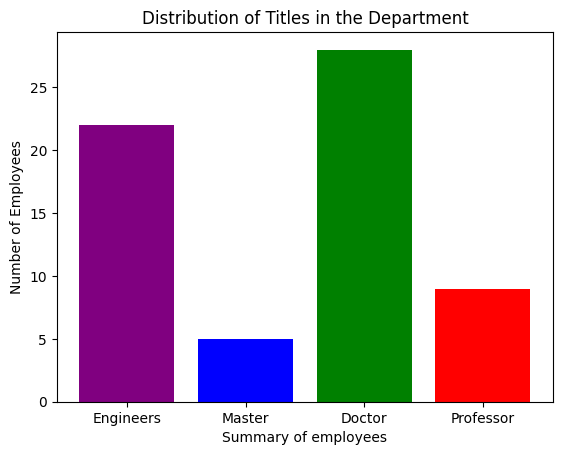

In [66]:
create_graph_summary(parsed_data)

**Task 2.** \
Create a new html file that links to the directions downloaded from https://rekrutacja.polsl.pl/wyszukiwarka-kierunkow-i-stopnia/?pa_kierunek=inf.

In [112]:
from typing import Final

SEARCH_ENGINE_DIRECTIONS: Final[str] = 'https://rekrutacja.polsl.pl/wyszukiwarka-kierunkow-i-stopnia/?pa_kierunek=inf'
SEARCH_ENGINE_DIV_SELECTOR: Final[str] = 'div.product-image a'
SEARCH_ENGINE_A_SELECTOR: Final[str] = 'a'
SEARCH_ENGINGE_A_HREF_SELECTOR: Final[str] = 'href'
SEARCH_ENGINGE_IMG_SELECTOR: Final[str] = 'img'
SEARCH_ENGINE_ALT_SELECTOR: Final[str] = 'alt'

In [74]:
from pydantic import BaseModel

class SearchDirectionDto(BaseModel):
  name: str # Name of direction
  url: str # Url to direction description

In [129]:
from dataclasses import dataclass

@dataclass
class SearchDirectionsParseService(AbstractParseService):

  def parse(self) -> ResponseCollectionDto:
    """
    Definition of parse method for extracting needed information about directions.

    Returns:
      ResponseCollectionDto: Data described as ResponseCollectionDto object.
    """
    items = self.soup.select(SEARCH_ENGINE_DIV_SELECTOR)
    collection = list()

    for item in items:
        link_url = item[SEARCH_ENGINGE_A_HREF_SELECTOR]
        img = item.find(SEARCH_ENGINGE_IMG_SELECTOR)
        if img is not None:
          img_alt = img.get(SEARCH_ENGINE_ALT_SELECTOR)
          collection.append(SearchDirectionDto(
              name = img_alt,
              url = link_url
          ))

    return ResponseCollectionDto(
        collection = collection,
        count = len(collection)
    )

In [132]:
another_soup = ScrapeService.get_response_as_soup(SEARCH_ENGINE_DIRECTIONS)
another_parser = SearchDirectionsParseService(another_soup)
another_results = another_parser.parse()

In [133]:
another_results

ResponseCollectionDto(collection=[SearchDirectionDto(name='Informatyka', url='https://rekrutacja.polsl.pl/kierunek/informatyka2/'), SearchDirectionDto(name='Informatyka (profil ogólnoakademicki)', url='https://rekrutacja.polsl.pl/kierunek/informatykaogolno/'), SearchDirectionDto(name='Informatyka (profil praktyczny)', url='https://rekrutacja.polsl.pl/kierunek/informatykaprak2/'), SearchDirectionDto(name='Informatyka (profil praktyczny Wydziału Matematyki Stosowanej)', url='https://rekrutacja.polsl.pl/kierunek/informatykarms/')], count=4)

In [137]:
from string import Template

html_template = Template('''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Search Directions</title>
</head>
<body>

<h2>Search Directions</h2>

<ul>
    $directions
</ul>

</body>
</html>
''')

directions_html = list()
for item in another_results.collection:
  directions_html.append(f'<li>${item.name}: <a href="${item.url}" target="_blank">${item.url}</a></li>')

html_content = html_template.substitute(directions='\n'.join(directions_html))

with open('task2_results.html', 'w') as f:
    f.write(html_content)